![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

# Callysto’s Weekly Data Visualization

## Air Quality in Canada

### Recommended Grade levels: 6-12
<br>

### Instructions
#### “Run” the cells to see the graphs
Click “Cell” and select “Run All”.<br> This will import the data and run all the code, so you can see this week's data visualization. Scroll to the top after you’ve run the cells.<br> 

![instructions](https://github.com/callysto/data-viz-of-the-week/blob/main/images/instructions.png?raw=true)

**You don’t need to do any coding to view the visualizations**.
The plots generated in this notebook are interactive. You can hover over and click on elements to see more information. 

Email contact@callysto.ca if you experience issues.

### About this Notebook

Callysto's Weekly Data Visualization is a learning resource that aims to develop data literacy skills. We provide Grades 5-12 teachers and students with a data visualization, like a graph, to interpret. This companion resource walks learners through how the data visualization is created and interpreted by a data scientist. 

The steps of the data analysis process are listed below and applied to each weekly topic.

1. Question - What are we trying to answer? 
2. Gather - Find the data source(s) you will need. 
3. Organize - Arrange the data, so that you can easily explore it. 
4. Explore - Examine the data to look for evidence to answer the question. This includes creating visualizations. 
5. Interpret - Describe what's happening in the data visualization. 
6. Communicate - Explain how the evidence answers the question. 

# Question

Numerous research have suggested possibilities of air pollution exposure leading to detrimental health conditions for humans. [Health Canada](https://www.canada.ca/en/health-canada/services/publications/healthy-living/2021-health-effects-indoor-air-pollution.html) estimates that air pollution contributes to **15,300 deaths per year** in Canada. To fight against air pollution, the [Government of Canada](https://www.canada.ca/en/environment-climate-change/campaigns/canadian-environment-week/clean-air-day/action-air-pollution.html#toc1) launched an ambitious plan, the 2030 Emissions Reduction Plan, which aims to reduce pollutants emissions to net-zero by 2050. In this notebook, we will investigate changes in trends in air pollution by looking at air pollutants emission from 1990 to 2020. Specifically, did the total emission decrease or increase during this period? 

### Goal
Our goal is to investigate the emissions of major air pollutants over the last 30 years. We will use bar graphs to observe changes in total emissions by each year, and use a pie graph to figure out which province in Canada contributes the most to emission of air pollutants. 

In addition to major air pollutants, we also focus on emissions of fine particulate matter (PM2.5) which are particles whose size is less than 2.5 microns (millionth of a meter), or roughly 1/30 the thickness of a human hair. Such fine particles come from human sources such as power plant emissions, car and truck exhaust, cigarettes and tobacco fumes, as well as natural sources such as smoke from wild fires or volcanoes.  These particles can get deep into a person's lungs and may lead to adverse health effects such as premature mortality, increased heart and lung diseases, acute and chronic bronchitis and more. 
   We will analyze the Canadian wildfire data and PM2.5 emissions to see if increased PM2.5 emissions can be attributed to wildfires.

# Gather

### Code:
The code below will import the Python programming libraries we need to gather and organize the data to answer our question.

In [1]:
## import libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from functools import partial
import plotly.subplots as sp
import scipy.stats as stats
from tqdm.notebook import tnrange 
from time import sleep
from IPython.display import clear_output

### Data:

In this notebook, we will integrate three different types of datasets: air pollutants emissions, wildfires in Canada, and Canadian population estimates. Original data sources are as follows:
- **Air Pollution Emissions Across Provinces**: [Canada's Air Pollutant Emissions Inventory](https://data.ec.gc.ca/data/substances/monitor/canada-s-air-pollutant-emissions-inventory/APEI_Tables_Canada_Provinces_Territories/?lang)
- **Wildfires in Canada**: [Canadian National Fire Database](https://cwfis.cfs.nrcan.gc.ca/ha/nfdb)
- **Canadian Population Estimates**: [Population Estimates from Statistics Canada](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710000901)<br>
<br>

[Government of Canada](https://www.canada.ca/en/environment-climate-change/services/air-pollution/pollutants/common-contaminants.html) identified sulphur oxides (sulfur oxides), nitrogen oxides, volatile organic compounds, particular matter, carbon monoxide and ammonia, and ground level ozone as the most common air contaminants in Canada. 

[Canada's Air Pollutant Inventory](https://data.ec.gc.ca/data/substances/monitor/canada-s-air-pollutant-emissions-inventory/APEI_Tables_Canada_Provinces_Territories/?lang) has a total of thirteen air pollutants listed. From here, we will focus on sulfur oxides, nitrogen oxides, volatile organic compounds, carbon monoxide, and ammonia; the pollutants that are marked as the most common air contaminants in Canada. Later in this notebook, we will look into particulate matter as well.


### Import the data

Run the following code cells to import air pollutants and population data. For the pollutants data, the data loading progress for each pollutant and each province will be shown by green progress bars. Wait until all the data is loaded and a table including the data is shown.

In [2]:
# import data :: Air Pollutants 

# create new dataframe
d = {"Province": [],
    "Pollutant": []}
    
provinces = ["AB", "BC", "ON", "MB", "NB", "NS", "YT", "QC", "SK", "NL", "PE"]
common_pollutants = ["NH3","CO","SOX","NOX","VOC"]
provnum = 0

def import_data(province, pollutants):
    df = pd.DataFrame.from_dict(d)
    for i in pollutants:
        p = pd.read_csv("https://raw.githubusercontent.com/callysto/data-files/main/data-viz-of-the-week/air-quality/data/province-pollutants/" + province + "_" + i + ".csv")
        p_total = p.loc[p["SECTORS"] == "GRAND TOTAL"]
        p_total = p_total.drop(["Unnamed: 1", "Unnamed: 2"], axis=1)
        p_total = p_total.rename(columns={"SECTORS":"Province"})
        p_total.at[1,"Province"] = province
        p_total.insert(1,"Pollutant", i, True)
        df = pd.concat([df, p_total], ignore_index=True)
        
        for i in tnrange(100, desc='Downloading ' + i + ' data for ' + province):
            startRow = 1 + i*100
            sleep(0.01)
    
    global provnum
    if provnum > 11:
        provnum = 0
    else:
        provnum += 1
            
    print("All provincial data for " + province + " has been downloaded." + 
         " Remaining provinces:" + str(len(provinces) - provnum) + "/" + str(len(provinces)) + ".") 
        
    return df

df = pd.concat(map(partial(import_data, pollutants=common_pollutants), provinces),ignore_index=True)
clear_output(wait=True)
df

,Province,Pollutant,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,AB,NH3,95261.6403072018,96392.6120160835,100809.748597631,102888.757346287,108909.29619548,117873.246725767,123629.070648118,126274.333185743,...,132641.48219304642,137630.5644576695,139707.6493382899,141095.12881051924,139937.588499843,132619.48058146506,124020.85788901642,130492.08344071463,131440.5311861856,133161.78812024335
1,AB,CO,1810389.43111,1674240.47593966,1694347.04215079,1670384.18553975,1713860.13181427,1699241.95442997,1707362.43286568,1747506.53522988,...,1015160.0103461307,1020173.0616697504,1044806.4504109875,1083451.1163415606,985516.9393906805,950437.9647403281,1009269.6788974762,1001193.5531940853,992062.7619323295,890235.0708604576
2,AB,SOX,512405.17695316,524144.18481018,564717.776802336,571473.902885045,594900.160427548,569212.579973766,556679.129617835,522989.264001654,...,343134.3155222252,333877.81221442844,314187.69199869514,291592.47385681805,259725.37296679677,239568.79130380912,241439.9996413067,225758.93672193997,221287.8184768282,182536.32978225523
3,AB,NOX,613284.286308138,585705.325771787,609463.591567837,640884.40812074,692547.095770932,718124.92776215,749396.467537041,815873.317241737,...,691938.4815302572,649050.7227761747,643710.2914325446,656735.6508195029,630979.6246838769,603268.9203695664,627271.8514718515,625976.446078691,625636.7223761571,567697.196882858
4,AB,VOC,643752.225882095,624633.776990753,642477.562274331,654384.418252455,669557.452773095,679792.446419822,708522.408799455,678362.261827271,...,478680.32202698546,518824.5195309372,556411.0771793935,572615.3277760863,517421.8223597623,476740.12370002636,474301.4225637558,501074.8373153089,492636.6127706006,456932.64826396375
5,BC,NH3,22995.98762586,22310.886792502,22883.1150417984,23423.8931662309,23446.1514055948,24276.1421233274,24313.75441344,24261.030715911,...,19673.4470240708,19597.051431377542,19957.012943875867,19406.653921754787,19454.271981683003,19898.551541310226,20144.785616232846,20962.112257326105,21088.673201511338,22697.673252842054
6,BC,CO,2340343.89807514,2353114.49948287,2155699.79068061,2363510.21170183,2295989.70353345,2238613.93624961,2110270.19513658,2027978.9638128,...,736230.3884552313,737041.7592425122,661969.6176623267,660414.8387121931,630995.6122458712,660545.0260044149,681319.8756605458,693402.9002921798,679666.7428935495,645152.2971299121
7,BC,SOX,110747.399637798,90689.8452481818,79350.3244725266,77422.0600451359,88186.6621085845,82358.9697832929,78644.3073207129,82107.3215675099,...,71221.31596841455,73210.97682913509,75419.82356246334,75847.2205857285,62540.79620334712,68443.73119245718,71916.754088719,73356.01798952006,68922.92225545063,69915.38885010494
8,BC,NOX,285967.668928385,270828.072928627,262126.87054053,271899.114584623,294263.944805499,296947.832724704,306607.279221647,316168.481311414,...,231269.51503536143,225107.53352463656,228222.3006968001,222718.86163379668,213184.6781576076,210834.77706498865,215964.18070540993,223692.23969135195,220584.65206492456,209468.75310248425
9,BC,VOC,374973.17600456,376762.866466494,355183.10665247,390269.150395119,376905.415140029,379776.996750471,364154.090672387,354883.302639578,...,167721.30573365907,165183.63438867455,166548.60452788635,159386.5212685707,156313.0394510723,144381.4086480633,142284.0831581869,141676.0150762879,139949.588154865,131210.9765895798


In [3]:
# import data :: Population per Capita
per_capita = pd.read_csv("https://raw.githubusercontent.com/callysto/data-files/main/data-viz-of-the-week/air-quality/data/per-capita.csv")
per_capita

,REF_DATE,GEO,DGUID,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1990-01,Canada,2016A000011124,Persons,249,units,0,v1,1,27463550,NaN,NaN,NaN,0
1,1990-04,Canada,2016A000011124,Persons,249,units,0,v1,1,27567161,NaN,NaN,NaN,0
2,1990-07,Canada,2016A000011124,Persons,249,units,0,v1,1,27691138,NaN,NaN,NaN,0
3,1990-10,Canada,2016A000011124,Persons,249,units,0,v1,1,27807591,NaN,NaN,NaN,0
4,1991-01,Canada,2016A000011124,Persons,249,units,0,v1,1,27854861,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,2021-01,Nunavut,2016A000262,Persons,249,units,0,v7,15,39255,NaN,NaN,NaN,0
1790,2021-04,Nunavut,2016A000262,Persons,249,units,0,v7,15,39336,NaN,NaN,NaN,0
1791,2021-07,Nunavut,2016A000262,Persons,249,units,0,v7,15,39403,NaN,NaN,NaN,0
1792,2021-10,Nunavut,2016A000262,Persons,249,units,0,v7,15,39589,NaN,NaN,NaN,0


### Comment on the data

[Canada's Air Pollutant Inventory](https://data.ec.gc.ca/data/substances/monitor/canada-s-air-pollutant-emissions-inventory/APEI_Tables_Canada_Provinces_Territories/?lang) datasets include information about air pollutant emissions from all provinces in Canada. Since we need to download multiple Microsoft Excel files to gather all provincial data, we have already completed the **primary data cleaning** here for your convenience. Notice there are 55 rows and 33 columns in the cleaned dataset.

The [Statistics Canada](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710000901) dataset includes information on monthly population estimates from January 1990 to January 2022. 

We will focus our analysis on the data gathered between the years **1990 and 2020 only**. 

_This data is 1794 rows and 14 columns_ 

# Organize

The code below will arrange the data cleanly so that we can analyze it. This is a quality control step for our data which detects anything odd with the data (e.g. structure, missing values), fixes the oddities, and checks if the fixes worked. 

We want to look at provincial emissions of air pollutants *per capita*. To achieve this, first we need to combine the air pollutants and population per capita dataframes that have been already downloaded and imported. To combine the two dataframes, we rename the `GEO` variable in the population per capita dataframe `Province`. 

Once both data are cleaned, we merge the two datasets based on `Year` and `Province`. The resulting dataset will contain provincial air pollutant emissions and population estimates for every year between 1990 and 2020. Then we divide air pollutant emissions `Value` by population `Per Capita` to get emission `By Capita`. 

## Air Pollutants and Population per Capita

In [4]:
# data cleaning for air pollutant data
air_pollutant = df.melt(id_vars = ["Province", "Pollutant"], var_name = "Year", value_name = "Value")
air_pollutant["Year"] = air_pollutant["Year"].astype(int)

# data cleaning for per capita data
prov = {"Canada": "CAN", "Newfoundland and Labrador": "NL", "Prince Edward Island":"PE",
       "Nova Scotia":"NS", "New Brunswick":"NB", "Quebec":"QC", "Ontario":"ON",
       "Manitoba":"MB", "Alberta":"AB", "Saskatchewan":"SK", "British Columbia":"BC",
       "Yukon":"YK", "Northwest Territories":"NT", "Nunavut":"NU"}
per_capita = per_capita.replace(prov)
per_capita["Year"]=pd.to_datetime(per_capita["REF_DATE"]).dt.year
per_capita=per_capita.groupby(["Year","GEO"], as_index=False).mean()
per_capita = per_capita[["Year", "GEO", "VALUE"]]
per_capita = per_capita.loc[per_capita["Year"] < 2021]
per_capita = per_capita.rename(columns= {"GEO":"Province", "VALUE":"Per Capita"})

# merge the air pollutant and per capita datsets
pollutant_capita = pd.merge(air_pollutant, per_capita, on=["Year", "Province"])

# divide 
pollutant_capita["Value"] = pd.to_numeric(pollutant_capita["Value"])
pollutant_capita["By Capita"] = pollutant_capita["Value"].div(pollutant_capita["Per Capita"])
pollutant_capita

,Province,Pollutant,Year,Value,Per Capita,By Capita
0,AB,NH3,1990,9.526164e+04,2540901.75,0.037491
1,AB,CO,1990,1.810389e+06,2540901.75,0.712499
2,AB,SOX,1990,5.124052e+05,2540901.75,0.201663
3,AB,NOX,1990,6.132843e+05,2540901.75,0.241365
4,AB,VOC,1990,6.437522e+05,2540901.75,0.253356
...,...,...,...,...,...,...
1545,PE,NH3,2020,3.203449e+03,160633.75,0.019943
1546,PE,CO,2020,2.030025e+04,160633.75,0.126376
1547,PE,SOX,2020,2.709045e+02,160633.75,0.001686
1548,PE,NOX,2020,3.301916e+03,160633.75,0.020556


In [5]:
# calculate mean per capita emission by pollutants. 
pollutant_capita_mean = pollutant_capita[["Province", "Pollutant", "By Capita"]].groupby(["Province", "Pollutant"]).mean()
pollutant_capita_mean = pollutant_capita_mean.rename(columns={"By Capita": "Mean"}).reset_index()
pollutant_capita_mean

,Province,Pollutant,Mean
0,AB,CO,0.426834
1,AB,NH3,0.038578
2,AB,NOX,0.209131
3,AB,SOX,0.131820
4,AB,VOC,0.179616
5,BC,CO,0.340157
6,BC,NH3,0.005356
7,BC,NOX,0.064060
8,BC,SOX,0.018102
9,BC,VOC,0.063772


In [6]:
# calculate total emission of each pollutants from all provinces.  
pollutant_capita_sum = pollutant_capita[["Province", "Pollutant", "Value"]].groupby(["Province", "Pollutant"]).sum()
pollutant_capita_sum = pollutant_capita_sum.rename(columns={"Value": "Total Emission"}).reset_index()
pollutant_capita_sum

,Province,Pollutant,Total Emission
0,AB,CO,4.194696e+07
1,AB,NH3,3.989200e+06
2,AB,NOX,2.121461e+07
3,AB,SOX,1.284070e+07
4,AB,VOC,1.799650e+07
5,BC,CO,4.184570e+07
6,BC,NH3,6.902834e+05
7,BC,NOX,8.206904e+06
8,BC,SOX,2.320020e+06
9,BC,VOC,7.951781e+06


### Comment on the data
Other than looking at air pollution emissions per capita, we also want to look at total amount of air pollution across all provinces. The code above allows us to calculate the cumulative pollutant emissions from 1990 to 2020. 

## Wildfires in Canada

In [7]:
def organize(df, title):
    df = pd.read_csv(df)
    df = df[df["Jurisdiction"].notna()]
    df = df.melt(id_vars = ["Jurisdiction", "Month"],
                 var_name = "Year",value_name = "Number")
    df = df.fillna(0)
    df = df.groupby(["Jurisdiction"])["Number"].sum()
    df = pd.Series(df).to_frame().reset_index()
    df = df.replace(prov)
    df = df.rename(columns={"Number":str(title),
                                     "Jurisdiction":"Province"})
    return df

firenum = organize("https://raw.githubusercontent.com/callysto/data-files/main/data-viz-of-the-week/air-quality/data/wildfire/total_fire.csv", "Number of Fire")
firearea = organize("https://raw.githubusercontent.com/callysto/data-files/main/data-viz-of-the-week/air-quality/data/wildfire/total_area_burnt.csv", "Area Burned (hectre)")
fire = pd.merge(firenum, firearea, on=["Province"])
fire

,Province,Number of Fire,Area Burned (hectre)
0,AB,38015.0,5.923754e+06
1,BC,56698.0,5.123188e+06
2,MB,10953.0,6.672828e+06
3,NB,9985.0,2.908940e+04
4,NL,2937.0,4.148917e+05
5,NT,7295.0,1.859678e+07
6,NS,8841.0,2.159480e+04
7,ON,35041.0,4.865412e+06
8,Parks Canada,2512.0,2.401450e+06
9,PE,11.0,2.160128e+01


### Comment on the data
The [Canadian National Fire Database](https://cwfis.cfs.nrcan.gc.ca/ha/nfdb) has various information on wildfires in Canada. We will look into the total number of wildfires and the total area burned by province. Using this information, we can observe whether `Number of Fire` or `Area Burned (hectre)` correlates better with PM2.5 emissions. 

## Particulate Matter (PM2.5) Emissions

In [8]:
common_pollutants= ["PM25"]
provnum = 0
pm25 = pd.concat(map(partial(import_data, pollutants=common_pollutants), provinces), ignore_index=True)
pm25 = pm25.melt(id_vars = ["Province", "Pollutant"], var_name = "Year", value_name = "Total Emission")
pm25["Total Emission"] = pd.to_numeric(pm25["Total Emission"])
pm25 = pm25.groupby(["Province"])["Total Emission"].sum()
pm25 = pd.Series(pm25).to_frame().reset_index()
pm25_fire = pd.merge(pm25, fire, on=["Province"])
clear_output(wait=True)
pm25_fire

,Province,Total Emission,Number of Fire,Area Burned (hectre)
0,AB,1.330822e+07,38015.0,5.923754e+06
1,BC,2.600960e+06,56698.0,5.123188e+06
2,MB,3.077027e+06,10953.0,6.672828e+06
3,NB,6.211207e+05,9985.0,2.908940e+04
4,NL,4.874982e+05,2937.0,4.148917e+05
5,NS,6.455169e+05,8841.0,2.159480e+04
6,ON,5.625880e+06,35041.0,4.865412e+06
7,PE,1.235335e+05,11.0,2.160128e+01
8,QC,3.890464e+06,21222.0,8.173951e+06
9,SK,1.422373e+07,16964.0,1.488577e+07


### Comment on the data
Here we used the same method that we previsouly developed to gather provincial data for air pollutant emissions. To only focus our attention on PM2.5, we trimmed our data to look at total PM2.5 emissions across provinces.

# Explore

First, we will look at a **stacked bar graph** that displays emissions per capita across all provinces. This graph also allows us to observe yearly changes in pollutant emissions. If you want to look at a specific year, drag the button on the slidebar at the bottom of the graph. Additionally, select or unselcect the type of air emission you wish to look at.

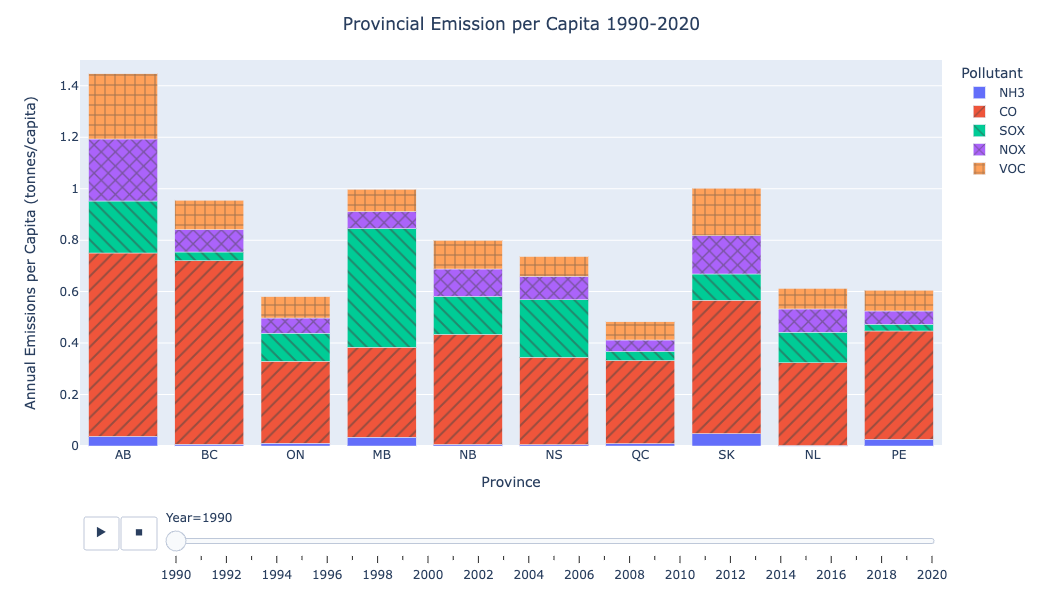

In [14]:
# creating stacked bar graph
stacked_bar = px.bar(pollutant_capita, x="Province", y="By Capita", color="Pollutant", pattern_shape="Pollutant",
                     animation_frame="Year", range_y=[0,1.5])
stacked_bar.update_layout(height=600, width=800, title_text="Provincial Emission per Capita 1990-2020",
                          title_x=0.5)
stacked_bar.update_yaxes(title="Annual Emissions per Capita (tonnes/capita)")
stacked_bar.show()

Second, We will build a **bar graph** to depict cumulative contribution of air pollutants for each province. Click the pollutant drop down menu to select the type of air pollutant you wish to look at. 

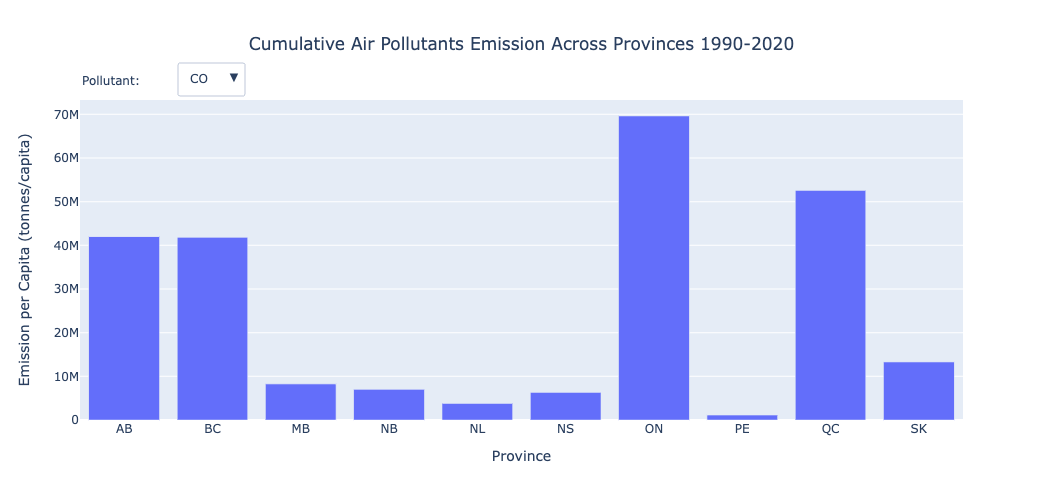

In [10]:
# creating bar graph 
bar_fig = go.Figure()
firstvis = lambda x: True if (x=="CO") else False

for pollutant in pollutant_capita_sum["Pollutant"].unique():
    bar_fig.add_trace(go.Bar(x=pollutant_capita_sum.loc[pollutant_capita_sum["Pollutant"] == str(pollutant)]["Province"],
                             y=pollutant_capita_sum.loc[pollutant_capita_sum["Pollutant"] == str(pollutant)]["Total Emission"],
                             name=str(pollutant),
                             visible=firstvis(pollutant)))

pollutant_buttons = []
num = 0
for p in pollutant_capita_sum["Pollutant"].unique():
    traces = [False] * len(pollutant_capita_sum["Pollutant"].unique())
    if traces[num] == False:
        traces[num] = True
    num += 1 
    pollutant_buttons.append(dict(label=str(p),
                                 method="update",
                                 args=[{"visible":traces}]))

bar_fig.update_layout(showlegend=False,
                      updatemenus=[dict(active=0,
                                        buttons=pollutant_buttons,
                                        direction="down", pad={"r": 10, "t": 10},
                                        showactive=True, x=0.11, xanchor="left", y=1.15, yanchor="top")],
                      legend=dict(yanchor="top", y=1, xanchor="left", x=0.01, bgcolor='rgba(0,0,0,0)'),
                      annotations=[dict(text="Pollutant:",x=0, y=1.09, yref="paper", xref="paper", align="left", showarrow=False)],
                      xaxis_title="Province", yaxis_title="Emission per Capita (tonnes/capita)",
                      title_text="Cumulative Air Pollutants Emission Across Provinces 1990-2020", title_x=0.5, width=800, height=500,
                      hovermode="x unified",barmode="group")

bar_fig.show()

Lastly, we will use a **pie graph** to see provincial contributions of total air pollutant emissions. Try to observe if you can see any interesting patterns here. Which province contributed the most to each type of air pollutant?

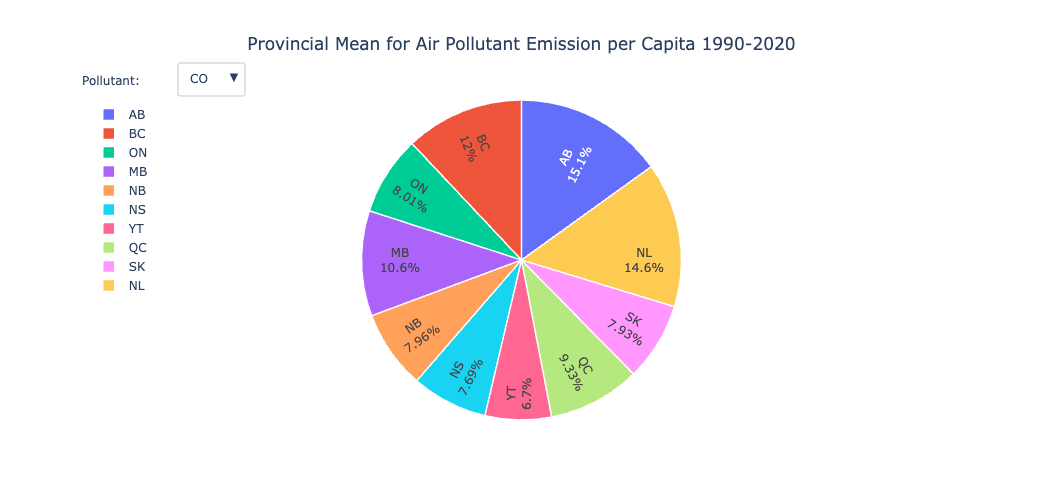

In [11]:
# data exploration for creating pie 

pie_fig = go.Figure()

for pollutant in pollutant_capita_mean["Pollutant"].unique():
    pie_fig.add_trace(go.Pie(labels=provinces, values=pollutant_capita_mean.loc[pollutant_capita_mean["Pollutant"] == pollutant]["Mean"],
                             name=pollutant, insidetextorientation='radial', sort=False,
                             visible=firstvis(pollutant)))

pie_fig.update_traces(textposition='inside', textinfo='percent+label', 
                      marker=dict(line=dict(color='#FFFFFF', width=1.5)))

pie_fig.update_layout(showlegend=True,
                      updatemenus=[dict(active=0,
                                        buttons=pollutant_buttons,
                                        direction="down", pad={"r": 10, "t": 10},
                                        showactive=True, x=0.11, xanchor="left", y=1.15, yanchor="top")],
                      legend=dict(yanchor="top", y=1, xanchor="left", x=0.01, bgcolor='rgba(0,0,0,0)'),
                      annotations=[dict(text="Pollutant:",x=0, y=1.09, yref="paper", xref="paper", align="left", showarrow=False)],
                      xaxis_title="Province", yaxis_title="Emission per Capita (tonnes/capita)",
                      title_text="Provincial Mean for Air Pollutant Emission per Capita 1990-2020", title_x=0.5, width=800, height=500)


pie_fig.show()

Now we take a look at the wildfire and PM2.5 data combined. Here, we created subplots of scatterplots to depict any relationships present among the two datasets. We see similar trends in the wildfire data and PM2.5 emission data, as expected. But what does it really mean?

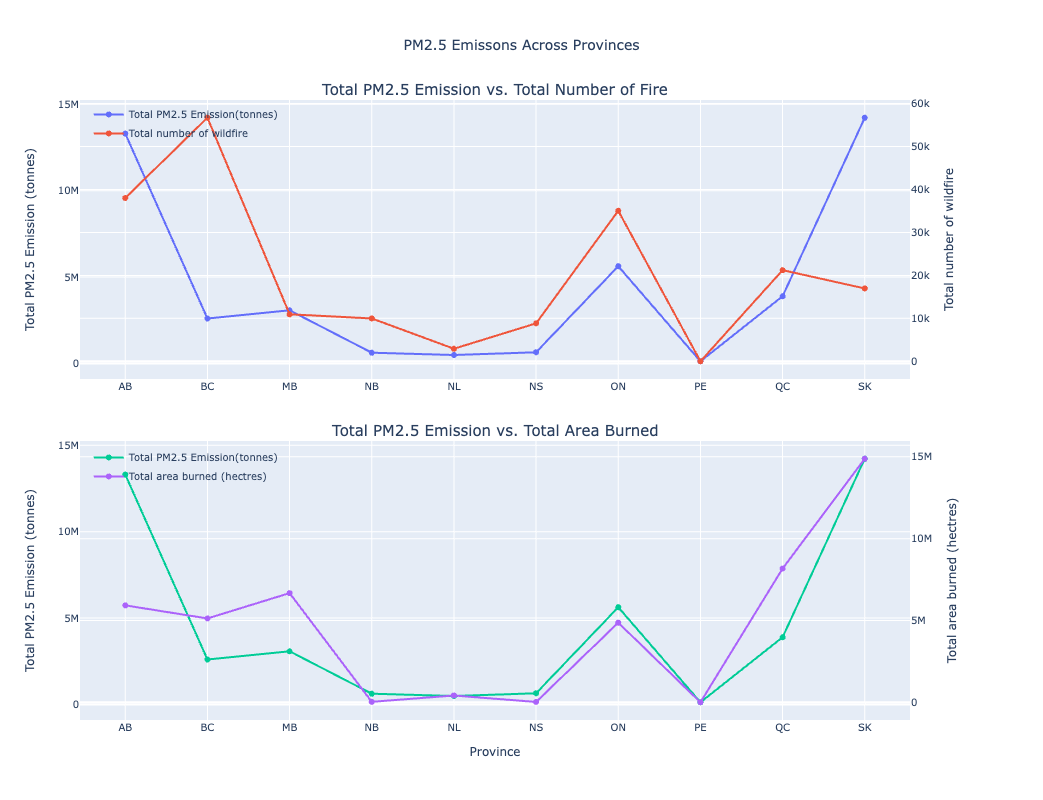

In [12]:
fire_fig = sp.make_subplots(
    rows=2, cols=1,
    specs=[[{"secondary_y": True}],
          [{"secondary_y": True}]],
    subplot_titles=("Total PM2.5 Emission vs. Total Number of Fire","Total PM2.5 Emission vs. Total Area Burned"),
    vertical_spacing = 0.1)

fire_fig.add_trace(go.Scatter(x=pm25_fire["Province"], y=pm25_fire["Total Emission"], name="Total PM2.5 Emission(tonnes)", showlegend=True, legendgroup="group1"),
                   row=1, col=1, secondary_y=False)
fire_fig.add_trace(go.Scatter(x=pm25_fire["Province"], y=pm25_fire["Number of Fire"], name="Total number of wildfire", showlegend=True, legendgroup="group1"),
                   row=1, col=1, secondary_y=True)
fire_fig.add_trace(go.Scatter(x=pm25_fire["Province"], y=pm25_fire["Total Emission"], name="Total PM2.5 Emission(tonnes)", showlegend=True, legendgroup="group2"),
                   row=2, col=1, secondary_y=False)
fire_fig.add_trace(go.Scatter(x=pm25_fire["Province"], y=pm25_fire["Area Burned (hectre)"], name="Total area burned (hectres)", showlegend=True, legendgroup="group2"),
                   row=2, col=1, secondary_y=True)

fire_fig.update_yaxes(title_text="Total PM2.5 Emission (tonnes)", row=1, col=1, secondary_y=False)
fire_fig.update_yaxes(title_text="Total number of wildfire", row=1, col=1, secondary_y=True)
fire_fig.update_yaxes(title_text="Total PM2.5 Emission (tonnes)", row=2, col=1, secondary_y=False)
fire_fig.update_yaxes(title_text="Total area burned (hectres)", row=2, col=1, secondary_y=True)

fire_fig.update_annotations(font_size=15)

fire_fig.update_layout(hovermode="x unified", font=dict(size=10),title_x = 0.5)

fire_fig.update_layout(
    height=800, 
    width=800, 
    title_text="PM2.5 Emissons Across Provinces", 
    xaxis2_title = "Province",
    legend_tracegroupgap = 305,
    legend=dict(yanchor="top", y=1, xanchor="left", x=0.01, bgcolor='rgba(0,0,0,0)')
)

fire_fig.show()

# Interpret
Here are some of the interesting trends we notice from the above visualizations:
1. Air pollutant emissions have decreased significantly over the last 30 years from all provinces. Saskatchewan emissions are the highest in the country after 30, why do you think that is? 
1. Alberta has been a huge contributor for ammonia emissions, nitrogen oxides, sulphur oxides and volatile organic compounds emissions historically. 
1. The unusually high PM2.5 emissions from Saskatchewan seem to be heavily related to the *total area burnt* by wildfire, whereas high PM2.5 emissions from Alberta seem to be more related to the *total number* of wildfires. So, which one of the two variables are more strongly correlated with PM2.5 emissions?

In [13]:
# calculating correlational coefficient for the occurance of wildfire and PM2.5 emission.
corr, pval=stats.pearsonr(pm25_fire["Total Emission"],pm25_fire["Area Burned (hectre)"])
print("Correlation coefficient for total area burnt and total PM2.5 emission: " + str(corr))
corr, pval=stats.pearsonr(pm25_fire["Total Emission"],pm25_fire["Number of Fire"])
print("Correlation coefficient for number of fire and total PM2.5 emission: " + str(corr))

Correlation coefficient for total area burnt and total PM2.5 emission: 0.7947497297236444
Correlation coefficient for number of fire and total PM2.5 emission: 0.3871731419610263


The code above confirmed to us that **the total number of wildfires and PM2.5 emissions** have a correlation value of $0.795$, whereas the **the total area burnt by wildfire and PM2.5 emissions** have a correlation value of $0.387$. Therefore, we can conclude that the total area burnt by wildfire is a better predictor for PM2.5 emissions.

# Communicate
Below are some writing prompts to help you reflect on the new information that is presented from the data. When we look at the evidence, think about what you perceive about the information. Is this perception based on what the evidence shows? If others were to view it, what perceptions might they have?

- I used to think ____________________ but now I think ____________________. 
- I wish I knew more about ____________________. 
- This visualization reminds me of ____________________. 
- I really like ____________________.

[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)